ICC CRICKET WORLD CUP ANALYSIS

In [3]:
# For data manipulation
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# To ignore the warnings Let's import warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
df = pd.read_csv(r'deliveries.csv')

In [79]:
# Printing the first 5 rows of the dataset and check the data
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# let's see complete information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                26119 non-null  int64  
 1   season                  26119 non-null  object 
 2   start_date              26119 non-null  object 
 3   venue                   26119 non-null  object 
 4   innings                 26119 non-null  int64  
 5   ball                    26119 non-null  float64
 6   batting_team            26119 non-null  object 
 7   bowling_team            26119 non-null  object 
 8   striker                 26119 non-null  object 
 9   non_striker             26119 non-null  object 
 10  bowler                  26119 non-null  object 
 11  runs_off_bat            26119 non-null  int64  
 12  extras                  26119 non-null  int64  
 13  wides                   665 non-null    float64
 14  noballs                 56 non-null   

In [83]:
# Let's see the shape of the data
df.shape

(26119, 22)

In [85]:
# Let's see which columns are there in the data
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [87]:
# Total number of 6's in the Series

tournament_6 = df[df['runs_off_bat'] == 6]['runs_off_bat'].count()
tournament_6

644

In [89]:
# Total number of 4's in the series

tournament_4 = df[df['runs_off_bat'] == 4]['runs_off_bat'].count()
tournament_4

2241

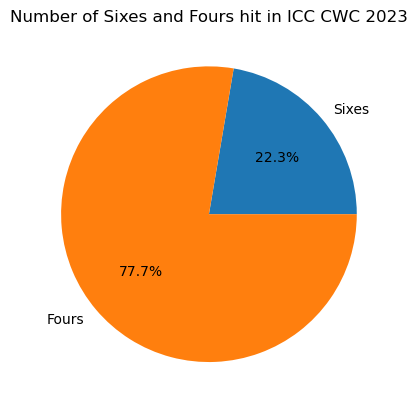

In [91]:
# Let's draw a pie chart to visualize the number of sixes and the number of fours hit in the series 

plt.pie([tournament_6, tournament_4], labels = ['Sixes', 'Fours'], autopct = '%1.1f%%')
plt.title('Number of Sixes and Fours hit in ICC CWC 2023')
plt.show()

In [93]:
# List of teams played in the ICC CWC 2023

teams = list(set(df['batting_team'].unique().tolist() + df['batting_team'].unique().tolist()))

print("Teams played the Season")
for i in range(len(teams)):
    print(f"{i+1} : {teams[i]}")

Teams played the Season
1 : Bangladesh
2 : Australia
3 : South Africa
4 : England
5 : Netherlands
6 : New Zealand
7 : Sri Lanka
8 : India
9 : Pakistan
10 : Afghanistan


In [95]:
# Top 10 Most runs Scorer 

df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

striker
V Kohli              765
RG Sharma            597
Q de Kock            594
R Ravindra           578
DJ Mitchell          552
DA Warner            535
SS Iyer              530
KL Rahul             452
HE van der Dussen    448
MR Marsh             441
Name: runs_off_bat, dtype: int64

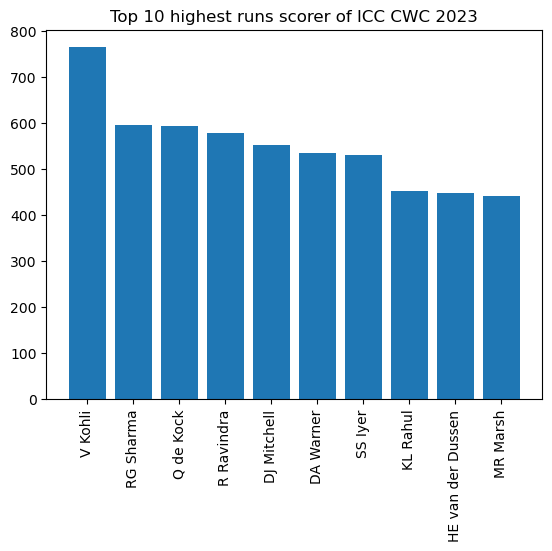

In [97]:
# Lets Plot the bar plot of the top 10 highest runs scorer of ICC CWC 2023 

plt.bar(df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index,df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).values)
plt.title('Top 10 highest runs scorer of ICC CWC 2023')
plt.xticks(rotation='vertical')
plt.show()

In [99]:
# Top 10 players who hit Most number of 6's in the series

sixes_df = df[df['runs_off_bat'] == 6]

sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

striker
RG Sharma       31
SS Iyer         24
DA Warner       24
GJ Maxwell      22
DJ Mitchell     22
MR Marsh        21
Q de Kock       21
DA Miller       20
H Klaasen       19
Fakhar Zaman    18
Name: runs_off_bat, dtype: int64

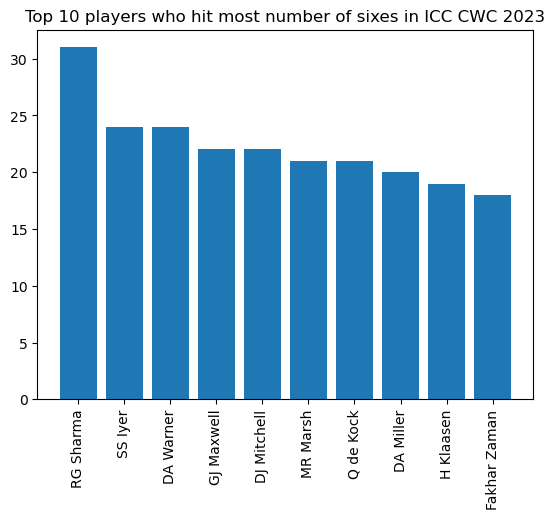

In [101]:
# Lets plot the line plot of the top 10 players who hit most number of sixes in ICC CWC 2023

plt.bar(sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index,sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.title('Top 10 players who hit most number of sixes in ICC CWC 2023')
plt.xticks(rotation='vertical')
plt.show()


In [103]:
# Top 10 players who hit most number of sixes in a single match

result1 = sixes_df.groupby(['match_id','striker'])['runs_off_bat'].count().sort_values(ascending=False).head(10)
result1

match_id  striker     
35        Fakhar Zaman    11
39        GJ Maxwell      10
18        MR Marsh         9
43        MR Marsh         9
18        DA Warner        9
24        GJ Maxwell       8
46        SS Iyer          8
23        H Klaasen        8
4         BKG Mendis       8
31        Fakhar Zaman     7
Name: runs_off_bat, dtype: int64

In [105]:
# Reseting the index of result1
result1 = result1.reset_index()
result1

# converting result1 to dataframe
result1 = pd.DataFrame(result1)
result1

,match_id,striker,runs_off_bat
0,35,Fakhar Zaman,11
1,39,GJ Maxwell,10
2,18,MR Marsh,9
3,43,MR Marsh,9
4,18,DA Warner,9
5,24,GJ Maxwell,8
6,46,SS Iyer,8
7,23,H Klaasen,8
8,4,BKG Mendis,8
9,31,Fakhar Zaman,7


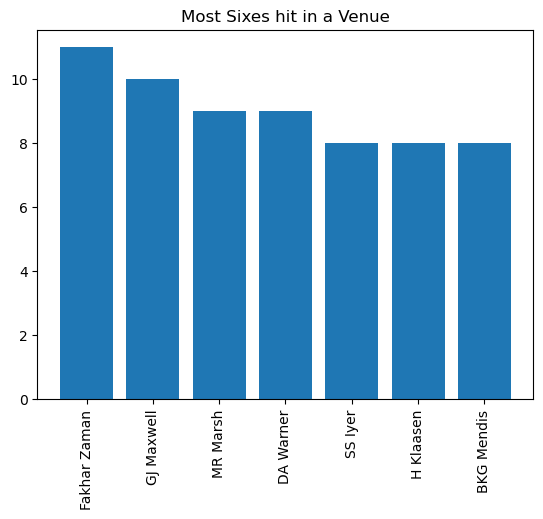

In [107]:
# Lets plot a bar plot of the result1 usign striker and runs_off_bat using matplotlib

plt.bar(result1['striker'], result1['runs_off_bat'])
plt.title('Most Sixes hit in a Venue')
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# Top 10 Venues by most number of 6's

sixes_df['venue'].value_counts().head(10)

venue
Wankhede Stadium, Mumbai                                                 106
Arun Jaitley Stadium, Delhi                                               84
M Chinnaswamy Stadium, Bengaluru                                          83
Maharashtra Cricket Association Stadium, Pune                             75
Himachal Pradesh Cricket Association Stadium, Dharamsala                  70
MA Chidambaram Stadium, Chepauk, Chennai                                  60
Narendra Modi Stadium, Ahmedabad                                          54
Eden Gardens, Kolkata                                                     50
Rajiv Gandhi International Stadium, Uppal, Hyderabad                      35
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow     27
Name: count, dtype: int64

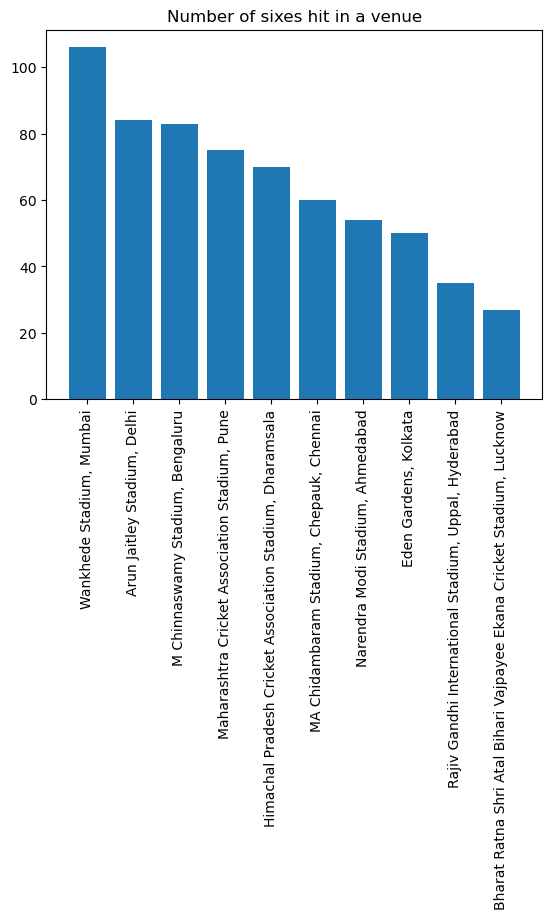

In [111]:
# Lets plot the bar plot of the number of sixes hit in a venue

plt.bar(sixes_df['venue'].value_counts().head(10).index, sixes_df['venue'].value_counts().head(10).values)
plt.title('Number of sixes hit in a venue')
plt.xticks(rotation='vertical')
plt.show()


In [113]:
# Top 10 players who hit Most number of 4's in the series

fours_df = df[df['runs_off_bat'] == 4]

fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

striker
V Kohli        68
RG Sharma      66
Q de Kock      57
R Ravindra     55
DP Conway      54
DJ Malan       50
DA Warner      50
DJ Mitchell    48
AK Markram     44
P Nissanka     44
Name: runs_off_bat, dtype: int64

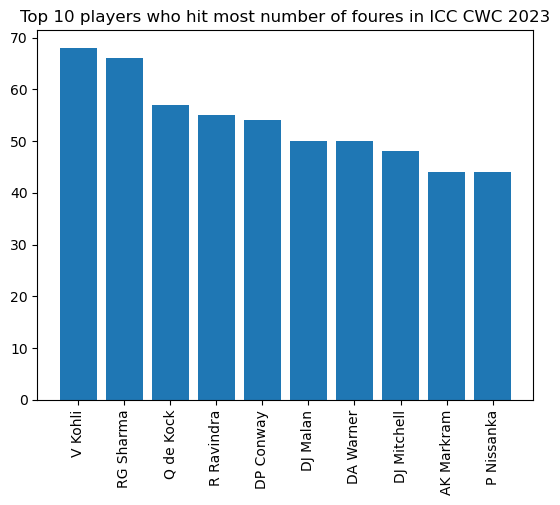

In [115]:
# Lets plot the top 10 players who hit most number of foures in ICC CWC 2023

plt.bar(fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index, fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.title('Top 10 players who hit most number of foures in ICC CWC 2023')
plt.xticks(rotation='vertical')
plt.show()

In [117]:
# Top 10 players who hit Most number of 4's in a single match

result2 =  fours_df.groupby(['match_id','striker'])['runs_off_bat'].count().sort_values(ascending=False).head(10)
result2


match_id  striker   
39        GJ Maxwell    21
1         DP Conway     19
43        MR Marsh      17
7         DJ Malan      16
9         RG Sharma     16
23        Q de Kock     15
48        TM Head       15
35        R Ravindra    15
8         BKG Mendis    14
4         AK Markram    14
Name: runs_off_bat, dtype: int64

In [119]:
# reset_index of result2
result2 = result2.reset_index()
result2

# converting result2 to dataframe
result2 = pd.DataFrame(result2)
result2

,match_id,striker,runs_off_bat
0,39,GJ Maxwell,21
1,1,DP Conway,19
2,43,MR Marsh,17
3,7,DJ Malan,16
4,9,RG Sharma,16
5,23,Q de Kock,15
6,48,TM Head,15
7,35,R Ravindra,15
8,8,BKG Mendis,14
9,4,AK Markram,14


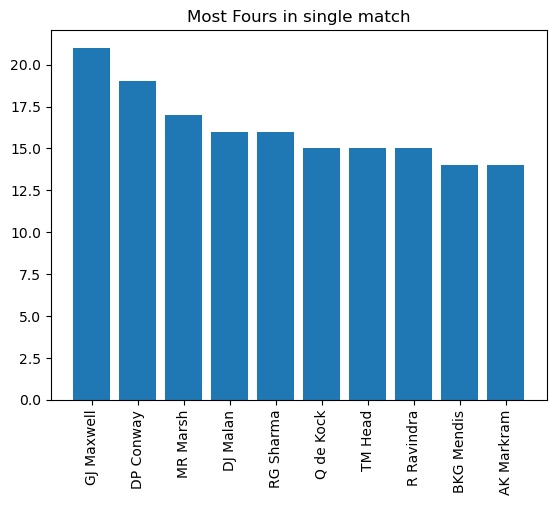

In [121]:
# Lets plot a bar plot of the result2 usign striker and runs_off_bat using matplotlib

plt.bar(result2['striker'], result2['runs_off_bat'])
plt.title('Most Fours in single match')
plt.xticks(rotation='vertical')
plt.show()

In [123]:
# Top 10 Venues by most number of 4's 

fours_df['venue'].value_counts().head(10)

venue
Arun Jaitley Stadium, Delhi                                              289
M Chinnaswamy Stadium, Bengaluru                                         260
Wankhede Stadium, Mumbai                                                 249
Himachal Pradesh Cricket Association Stadium, Dharamsala                 242
Eden Gardens, Kolkata                                                    220
Maharashtra Cricket Association Stadium, Pune                            219
Narendra Modi Stadium, Ahmedabad                                         212
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    197
MA Chidambaram Stadium, Chepauk, Chennai                                 189
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     164
Name: count, dtype: int64

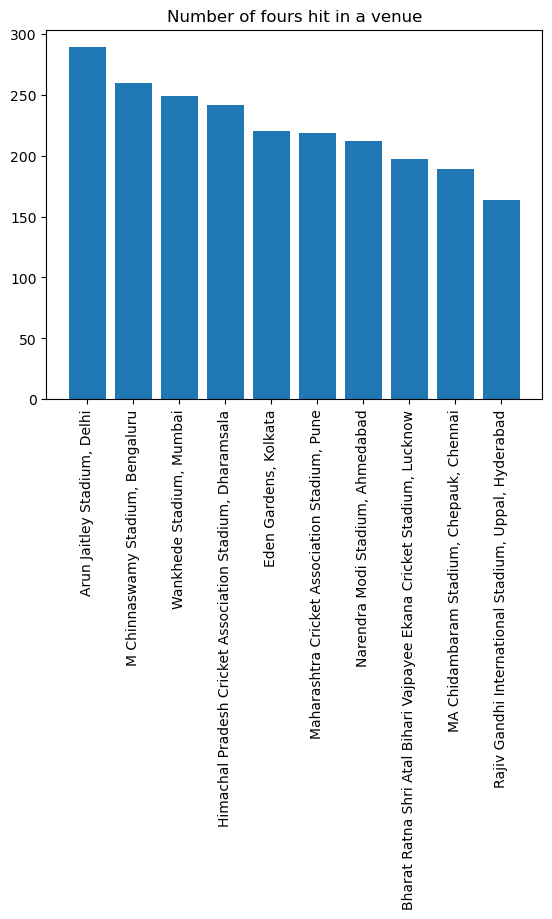

In [125]:
# Lets plot the number of fours hit in a Venue

plt.bar(fours_df['venue'].value_counts().head(10).index, fours_df['venue'].value_counts().head(10).values)
plt.title('Number of fours hit in a venue')
plt.xticks(rotation='vertical')
plt.show()

In [127]:
# Top 10 totalscores  

result3 = (df[df['innings'] == 1].groupby(['match_id','batting_team'])['runs_off_bat'].sum() + df[df['innings'] == 1].groupby(['match_id','batting_team'])['extras'].sum()).sort_values(ascending=False).head(10)
result3

match_id  batting_team
4         South Africa    428
45        India           410
35        New Zealand     401
24        Australia       399
20        South Africa    399
46        India           397
27        Australia       388
23        South Africa    382
18        Australia       367
7         England         364
dtype: int64

In [129]:
# Top 10 highest run scorers in a single match 

result3 = df.groupby(['match_id','striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
result3

match_id  striker          
39        GJ Maxwell           201
43        MR Marsh             177
23        Q de Kock            174
18        DA Warner            163
1         DP Conway            152
7         DJ Malan             140
48        TM Head              137
46        DJ Mitchell          134
32        HE van der Dussen    133
8         Mohammad Rizwan      131
Name: runs_off_bat, dtype: int64

In [131]:
# reset the index of result3
result3 = result3.reset_index()
result3

# converting result3 to dataframe
result3 = pd.DataFrame(result3)
result3

,match_id,striker,runs_off_bat
0,39,GJ Maxwell,201
1,43,MR Marsh,177
2,23,Q de Kock,174
3,18,DA Warner,163
4,1,DP Conway,152
5,7,DJ Malan,140
6,48,TM Head,137
7,46,DJ Mitchell,134
8,32,HE van der Dussen,133
9,8,Mohammad Rizwan,131


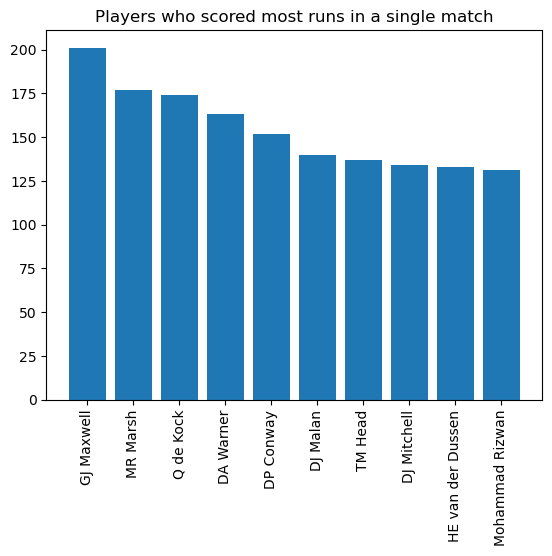

In [133]:
# Lets plot a bar plot of the result3

plt.bar(result3['striker'], result3['runs_off_bat'])
plt.title('Players who scored most runs in a single match')
plt.xticks(rotation='vertical')
plt.show()

In [135]:
# Runs hit by each team in the ICC Cricket World Cup 2023

(df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False)

batting_team
India           3160
Australia       3087
South Africa    2897
New Zealand     2864
Pakistan        2328
England         2245
Afghanistan     2095
Bangladesh      2053
Sri Lanka       2048
Netherlands     1862
dtype: int64

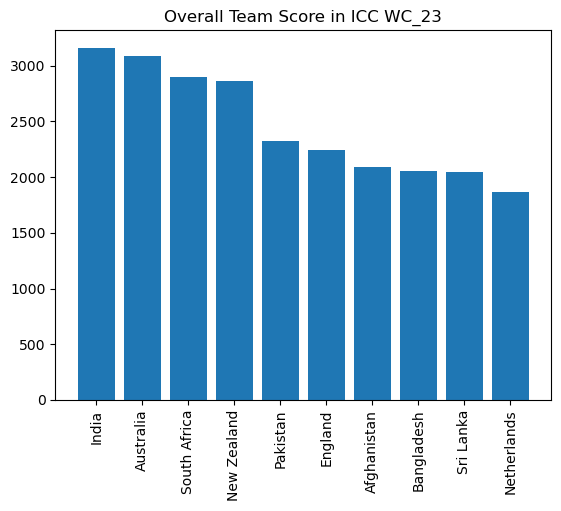

In [137]:
# lets plot the bar chart of the overall team score in the tournament

plt.bar((df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).index, (df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).values)
plt.title('Overall Team Score in ICC WC_23')
plt.xticks(rotation='vertical')
plt.show()

In [139]:
def OverallBatsmanStats(p_name):    
    player = p_name

    playerList = df['striker'].unique().tolist()
    
    #Checking if the player name is in list of players who played ICC CWC_2023
    if player in playerList:
        batsman = df[df['striker'] == player]
        
        # Find number of matches played by a player
        matches = batsman['match_id'].nunique()
        
        # Find number of runs scored by a player
        score = batsman['runs_off_bat'].sum()
        
        # Find number of 50's scored by a player
        runs = batsman.groupby('match_id')['runs_off_bat'].sum().values.tolist()

        fiftees = 0
        hundreds = 0

        for i in runs:
            if i >= 50 and i <100:
                fiftees += 1
                
            elif i >= 100:
                hundreds += 1
                        
        # Find the highest runs scored by a player
        highestScore = batsman.groupby('match_id')['runs_off_bat'].sum().max()
        
        # Find the number of times a batsman has been dismissed
        dismissed = batsman.player_dismissed.count()
        
        # Find number of Balls Faced by a player
        ballsFaced = batsman['runs_off_bat'].count()
        
        # Find SR of Batsman
        sr = (score/ballsFaced)*100
        
        # Find Average of Player
        avg = score/dismissed
        
        data = {
            'PlayeName': [player],
            'Matches' : [matches],
            'Score' : [score],
            'Avg' : [round(avg,3)],
            'SR' : [round(sr,3)],
            'BallsFaced': [ballsFaced],
            'HS' : [highestScore],
            '50s' : [fiftees],
            '100s' : [hundreds],
            'Dismissed': [dismissed]
        }
        
        Stats_df = pd.DataFrame(data)
                
        return Stats_df
    
    else:
        return 'Invalid Player Name, Please Re-Enter the name of Player or Check the spelling of the name'

In [141]:
OverallBatsmanStats('V Kohli')

,PlayeName,Matches,Score,Avg,SR,BallsFaced,HS,50s,100s,Dismissed
0,V Kohli,11,765,95.625,88.337,866,117,6,3,8


In [143]:
def AgainstEachTeamBatsmanAnalysis(p_name):
    player = p_name
    
    playerList = df['striker'].unique().tolist()
    
    #Checking if the player name is in list of players who played ICC CWC_2023
    if player in playerList:
        
        batsman = df[df['striker'] == player]
        
        matches_played = sorted(batsman['match_id'].unique().tolist())
        
        matches_played
                
        scores = []
        balls = []
        opponent = []
        venue = []

        for i in matches_played:
            scores.append(batsman[batsman['match_id'] == i]['runs_off_bat'].sum())
            balls.append(batsman[batsman['match_id'] == i]['runs_off_bat'].count())
            opponent.append(batsman[batsman['match_id'] == i]['bowling_team'].unique()[0])
            venue.append(batsman[batsman['match_id'] == i]['venue'].unique()[0].split(',')[-1])
        
        
        teamWise = {
            'Scores' : scores,
            'Balls' : balls,
            'Opponent' : opponent,
            'Venue' : venue
        }
        
        
        TeamWiseStats = pd.DataFrame(teamWise)
        
        return TeamWiseStats
    
    else:
        return 'Invalid Player Name, Please Re-Enter the name of Player or Check the spelling of the name'


In [145]:
AgainstEachTeamBatsmanAnalysis('V Kohli')


,Scores,Balls,Opponent,Venue
0,85,119,Australia,Chennai
1,55,57,Afghanistan,Delhi
2,16,19,Pakistan,Ahmedabad
3,103,98,Bangladesh,Pune
4,95,107,New Zealand,Dharamsala
5,0,9,England,Lucknow
6,88,96,Sri Lanka,Mumbai
7,101,128,South Africa,Kolkata
8,51,57,Netherlands,Bengaluru
9,117,113,New Zealand,Mumbai
